<a href="https://colab.research.google.com/github/dgscharan/Computer_vision/blob/main/saba_electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

     |████████████████████████████████| 48.9MB 64kB/s 


In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow
import easyocr

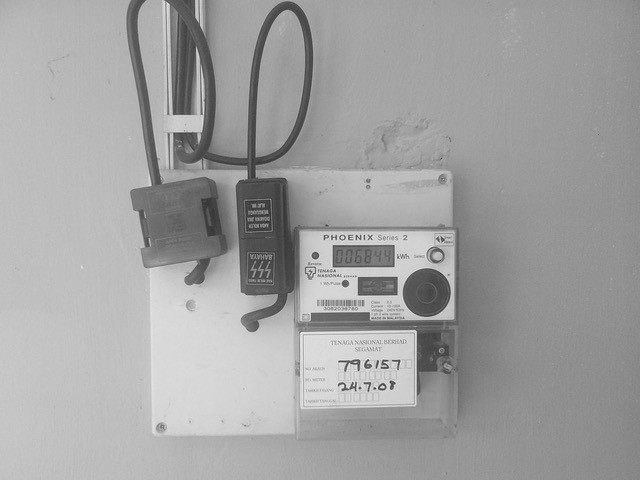

In [ ]:
img = cv2.imread('2.jpg',0)
cv2_imshow(img)

In [ ]:
reader = easyocr.Reader(['en'], gpu=True)
bounds = reader.readtext(img)
print(bounds)

[([[286, 43], [331, 43], [331, 63], [286, 63]], 'cDIE', 0.0874006450176239), ([[301, 63], [335, 63], [335, 75], [301, 75]], 'TRO', 0.1145157665014267), ([[106, 98], [142, 98], [142, 126], [106, 126]], '444', 0.17714925110340118), ([[225, 231], [327, 231], [327, 275], [225, 275]], '-38118', 0.028371497988700867)]


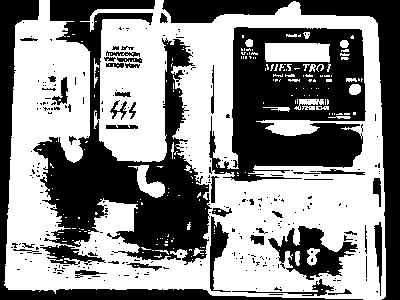

In [ ]:
ret, thresh1 = cv2.threshold(img, 100,255, cv2.THRESH_BINARY)
# cv2_imshow(thresh1)

# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,33,2)
# cv2_imshow(th3)


th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,111,2)

th2 = cv2.bitwise_not(th2)
cv2_imshow(th2)




In [ ]:
reader = easyocr.Reader(['en'], gpu=True)
bounds = reader.readtext(th2)
print(bounds)


[([[105, 103], [411, 103], [411, 189], [105, 189]], 'CASIl', 0.02149958349764347), ([[131, 287], [400, 287], [400, 367], [131, 367]], 'fr 99IMS', 0.6051232814788818), ([[49, 381], [466, 381], [466, 455], [49, 455]], '5V#A.M', 0.004182904493063688), ([[902, 406], [1231, 406], [1231, 462], [902, 462]], 'WO WiV Pewu', 0.0010728412307798862), ([[404, 552], [486, 552], [486, 654], [404, 654]], '4', 0.3187390863895416), ([[331, 666], [1057, 666], [1057, 827], [331, 827]], '73!55133', 0.018061816692352295), ([[824, 740], [864, 740], [864, 812], [824, 812]], 'r', 0.15236392617225647)]


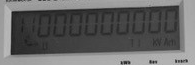

[[153 154 154 ... 166 166 166]
 [154 155 155 ... 166 166 166]
 [154 155 156 ... 166 166 166]
 ...
 [158 159 160 ... 181 176 179]
 [159 160 160 ... 177 178 178]
 [159 160 161 ... 180 180 175]]


In [ ]:
crop_img = img[145:210, 85:280]
cv2_imshow(crop_img)
print(crop_img)

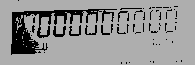

[[174 174 174 ... 174 174 174]
 [174 174 174 ... 174 174 174]
 [174 174 174 ... 174 174 174]
 ...
 [174 174 174 ... 174 174 174]
 [174 174 174 ... 174 174 174]
 [174 174 174 ... 174 174 174]]


In [ ]:
ret, thresh2 = cv2.threshold(crop_img, 50,174, cv2.THRESH_BINARY  )
cv2_imshow(thresh2)
print(thresh2)

In [ ]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,15,2)
cv2_imshow(th3)

error: ignored

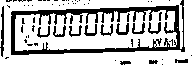

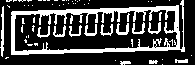

In [ ]:
th2 = cv2.adaptiveThreshold(crop_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,9,5)
cv2_imshow(th2)

th2_inv = cv2.bitwise_not(th2)
cv2_imshow(th2_inv)


In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=7515f827af1ba6ab8d9a7f2094e02334c6f267d7e42d6a5f1c1d7fa045c9ee89
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,870 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [ ]:
import pytesseract

In [ ]:
pytesseract.image_to_string(th2)

' \n\x0c'

In [ ]:
from imutils.perspective import four_point_transform
from imutils import contours
import imutils 


In [ ]:
DIGITS_LOOKUP = {
	(1, 1, 1, 0, 1, 1, 1): 0,
	(0, 0, 1, 0, 0, 1, 0): 1,
	(1, 0, 1, 1, 1, 1, 0): 2,
	(1, 0, 1, 1, 0, 1, 1): 3,
	(0, 1, 1, 1, 0, 1, 0): 4,
	(1, 1, 0, 1, 0, 1, 1): 5,
	(1, 1, 0, 1, 1, 1, 1): 6,
	(1, 0, 1, 0, 0, 1, 0): 7,
	(1, 1, 1, 1, 1, 1, 1): 8,
	(1, 1, 1, 1, 0, 1, 1): 9
}

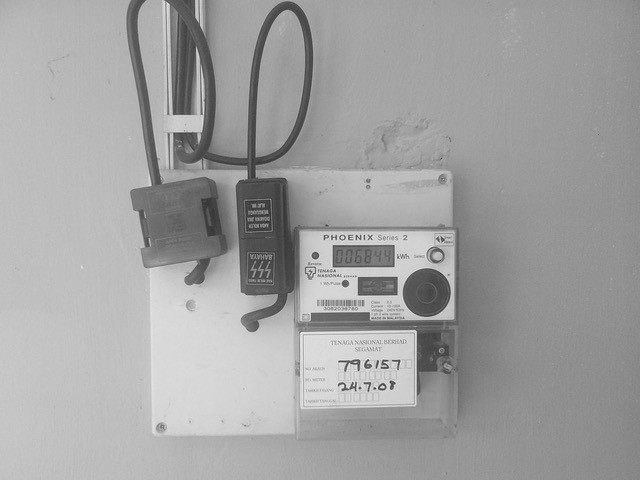

In [ ]:
cv2_imshow(img)

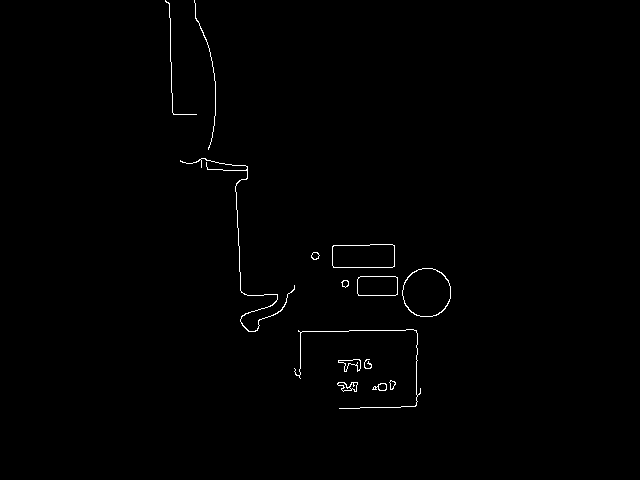

In [ ]:
blurred = cv2.GaussianBlur(img, (5,5),0)
edged = cv2.Canny(blurred, 100,350)
cv2_imshow(edged)

In [ ]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None 
# print(cnts)

for c in cnts:
    epsilon = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.02*epsilon, True)
    # print(approx)

    if len(approx) == 4:
        displayCnt = approx
        # print(c)


        break

[[[418 269]]

 [[404 282]]

 [[404 303]]

 [[416 315]]

 [[436 315]]

 [[449 301]]

 [[448 280]]

 [[435 269]]]
[[[394 245]]

 [[333 245]]

 [[332 265]]

 [[392 267]]]


In [ ]:
warped = four_point_transform(img, displayCnt.reshape(4,2))


cv2_imshow(warped)

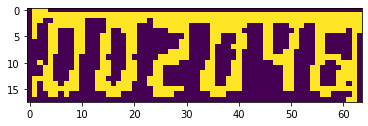

In [ ]:
# th2 = cv2.adaptiveThreshold(crop_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY,9,5)
# cv2_imshow(th2)

# th2_inv = cv2.bitwise_not(th2)
# cv2_imshow(th2_inv)



thresh2 = cv2.adaptiveThreshold(warped ,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,9,5)
thresh2 = cv2.bitwise_not(thresh2)
cv2_imshow(thresh2)



from matplotlib import pyplot as plt  
plt.imshow(thresh2)

resized = cv2.resize(img,(28,168))
plt.i


In [ ]:
pytesseract.image_to_string(thresh2, lang='eng')

'\x0c'

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []
 
for c in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    
    if w <20 and h > 20:
        digitCnts.append(c)



NameError: ignored

In [ ]:
digitCnts


[array([[[ 0,  8]],
 
        [[ 0, 43]]], dtype=int32), array([[[25,  5]],
 
        [[25, 24]],
 
        [[26, 25]],
 
        [[26, 30]],
 
        [[31, 35]],
 
        [[31, 37]],
 
        [[32, 37]],
 
        [[32, 29]],
 
        [[30, 29]],
 
        [[29, 28]],
 
        [[28, 28]],
 
        [[26, 26]],
 
        [[26, 20]],
 
        [[27, 19]],
 
        [[27,  7]]], dtype=int32)]

In [ ]:
!pip install imutils 

In [ ]:
if len(digitCnts) >0:
    digitCnts = contours.sort_contours(digitCnts,
        method="left-to-right")[0]
    digits = []

In [ ]:
digitCnts = contours.sort_contours(digitCnts,
	method="left-to-right")[0]
digits = []

# loop over each of the digits
for c in digitCnts:
	# extract the digit ROI
	(x, y, w, h) = cv2.boundingRect(c)
	roi = thresh[y:y + h, x:x + w]

	# compute the width and height of each of the 7 segments
	# we are going to examine
	(roiH, roiW) = roi.shape
	(dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
	dHC = int(roiH * 0.05)

	# define the set of 7 segments
	segments = [
		((0, 0), (w, dH)),	# top
		((0, 0), (dW, h // 2)),	# top-left
		((w - dW, 0), (w, h // 2)),	# top-right
		((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
		((0, h // 2), (dW, h)),	# bottom-left
		((w - dW, h // 2), (w, h)),	# bottom-right
		((0, h - dH), (w, h))	# bottom
	]
	on = [0] * len(segments)

	# loop over the segments
	for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
		# extract the segment ROI, count the total number of
		# thresholded pixels in the segment, and then compute
		# the area of the segment
		segROI = roi[yA:yB, xA:xB]
		total = cv2.countNonZero(segROI)
		area = (xB - xA) * (yB - yA)

		# if the total number of non-zero pixels is greater than
		# 50% of the area, mark the segment as "on"
		if total / float(area) > 0.5:
			on[i]= 1

	# lookup the digit and draw it on the image
	digit = DIGITS_LOOKUP[tuple(on)]
	digits.append(digit)
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
	cv2.putText(output, str(digit), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)

ZeroDivisionError: ignored